Note: All code in this file is original and has not been copied from anywhere

In [ ]:
import time
import random
import numpy as np
from scipy import linalg
from sklearn.datasets import make_sparse_coded_signal
from sklearn.decomposition import DictionaryLearning
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
from function1 import S,P,d,cal_recon_error
from BSUM_Dict import BSUM_Dict_Learning
from Acc_BSUM import Acc_BSUM_Dict_Learning
from Acc_BSUM2 import Acc_BSUM2_Dict_Learning
from MIBSUM import MIBSUM_Dict_Learning

mpl.rcParams['figure.dpi'] = 200

In [ ]:
SEED = 77
rng = np.random.default_rng(SEED)

In [ ]:
def generateRandomDict(D, K):
  A = np.empty((D, K), dtype = np.float64)
  for i in range(K):
    a_i = rng.standard_normal(D)
    a_i = a_i / np.linalg.norm(a_i) * (rng.uniform() ** (1/D))
    A[:, i] = a_i
    
  return A

In [ ]:
D = 15
N = 100
K = 20

lamda = 1
tol = .01

max_iter = 100

In [ ]:
Y, dictionary, code = make_sparse_coded_signal(
    n_samples=N, n_components=K, n_features=D, n_nonzero_coefs=10,
    random_state=5
)

In [ ]:
A0 = generateRandomDict(D, K)
X0 = rng.standard_normal(size = (K, N))
A_bsum, X_bsum,  objective_values_bsum, recon_error_bsum = BSUM_Dict_Learning(Y, (D, N, K), lamda, max_iter = max_iter, A_init = A0, X_init = X0)
_, _,  objective_values_acc_bsum, recon_error_acc_bsum = Acc_BSUM_Dict_Learning(Y, (D, N, K), lamda, max_iter = max_iter, A_init = A0, X_init = X0)
_, _,  objective_values_macc_bsum, recon_error_macc_bsum = Acc_BSUM2_Dict_Learning(Y, (D, N, K), lamda, max_iter = max_iter, A_init = A0, X_init = X0)
_, _,  objective_values_mibsum, recon_error_mibsum = MIBSUM_Dict_Learning(Y, (D, N, K), lamda, max_iter = max_iter, A_init = A0, X_init = X0)

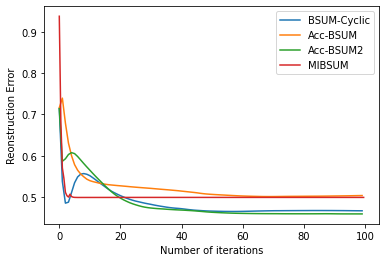

In [ ]:
plt.plot(np.arange(0, max_iter), recon_error_bsum, label='BSUM-Cyclic')
plt.plot(np.arange(0, max_iter), recon_error_acc_bsum, label='Acc-BSUM')
plt.plot(np.arange(0, max_iter), recon_error_macc_bsum, label='Acc-BSUM2')
plt.plot(np.arange(0, max_iter, .5), recon_error_mibsum, label='MIBSUM')
plt.legend(loc='upper right')
plt.xlabel("Number of iterations")
plt.ylabel("Reonstruction Error")
plt.show()

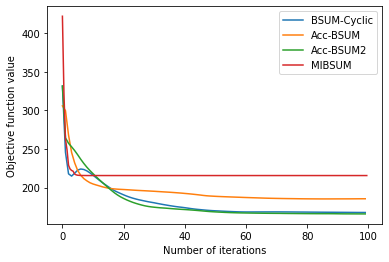

In [ ]:
x_marks = np.arange(0, max_iter)
plt.plot(x_marks, objective_values_bsum, label='BSUM-Cyclic')
plt.plot(x_marks, objective_values_acc_bsum, label='Acc-BSUM')
plt.plot(x_marks, objective_values_macc_bsum, label='Acc-BSUM2')
plt.plot(np.arange(0, max_iter, .5), objective_values_mibsum, label='MIBSUM')
plt.legend(loc='upper right')
plt.xlabel("Number of iterations")
plt.ylabel("Objective function value")
plt.show()